In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Homework_6/facebook_ads_data(2.0).csv')
#df = pd.read_csv('facebook_ads_data(2.0).csv')
df['ad_date'] = pd.to_datetime(df['ad_date'], format="mixed")

df['campaign_name'] = df['campaign_name'].astype(pd.StringDtype())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   string        
 2   total_spend        1494 non-null   float64       
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   float64       
 6   cpc                1443 non-null   float64       
 7   cpm                1462 non-null   float64       
 8   ctr                1462 non-null   float64       
 9   romi               1462 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), string(1)
memory usage: 116.8 KB


In [ ]:
print(df.shape)

df.isnull().sum()

(1494, 10)


,0
ad_date,0
campaign_name,0
total_spend,0
total_impressions,0
total_clicks,0
total_value,0
cpc,51
cpm,32
ctr,32
romi,32


In [ ]:
df.describe(include='all')


,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494,1494,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
unique,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Lookalike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2021-09-14 10:53:29.638554112,NaN,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
min,2020-11-11 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,2021-06-24 00:00:00,NaN,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,2021-08-26 00:00:00,NaN,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,2021-11-27 18:00:00,NaN,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2022-11-05 00:00:00,NaN,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


In [ ]:
df.head(10)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
5,2022-10-28,Expansion,630.33,5522,121,590.00,5.21,114.15,0.021912,0.936018
6,2022-10-27,Expansion,359.63,45223,87,376.69,4.13,7.95,0.001924,1.047438
7,2022-07-11,Expansion,33.02,2674,40,47.02,0.83,12.35,0.014959,1.423985
8,2022-07-10,Expansion,234.34,11266,74,254.62,3.17,20.80,0.006568,1.086541
9,2022-07-09,Expansion,461.70,25300,53,355.11,8.71,18.25,0.002095,0.769136


In [ ]:
# check years and days

df['Days'] = df['ad_date'].dt.isocalendar().day.astype(pd.StringDtype())
df['Years'] = df['ad_date'].dt.isocalendar().day.astype(pd.StringDtype())

print(f"Days : " + str(df['Days'].unique()))
print(f"Years : " + str(df['Years'].unique()))

Days : <StringArray>
['6', '2', '1', '7', '5', '4', '3']
Length: 7, dtype: string
Years : <StringArray>
['6', '2', '1', '7', '5', '4', '3']
Length: 7, dtype: string


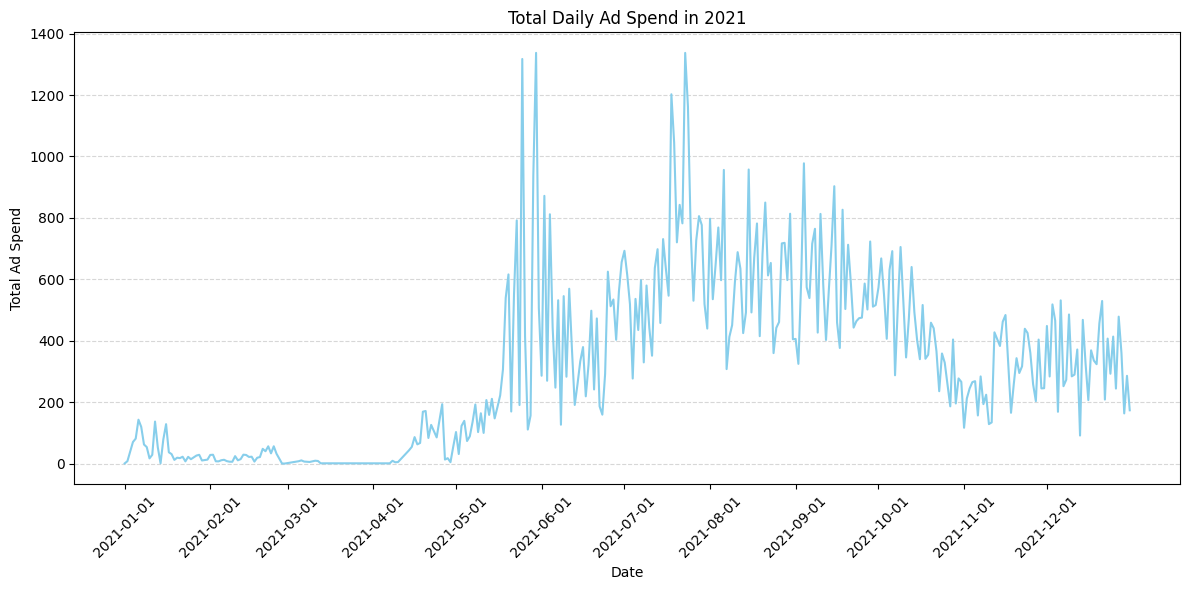

In [ ]:
# 1.1 - A chart showing total daily ad spend in 2021

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure ad_date is in datetime format
df['ad_date'] = pd.to_datetime(df['ad_date'], format="mixed")

# Filter data strictly for 2021
df_2021 = df[(df['ad_date'] >= '2021-01-01') & (df['ad_date'] < '2022-01-01')].copy()

# Aggregate total spend per day and sort by date
daily_spend = df_2021.groupby('ad_date')['total_spend'].sum().sort_index()

# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(daily_spend.index, daily_spend.values, color='skyblue')

# Formatting
plt.xlabel('Date')
plt.ylabel('Total Ad Spend')
plt.title('Total Daily Ad Spend in 2021')

tick_dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='MS')  # 'MS' for start of each month
# Format x-axis labels
plt.xticks(ticks=tick_dates, labels=tick_dates.strftime('%Y-%m-%d'), rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# Show the plot
plt.show()



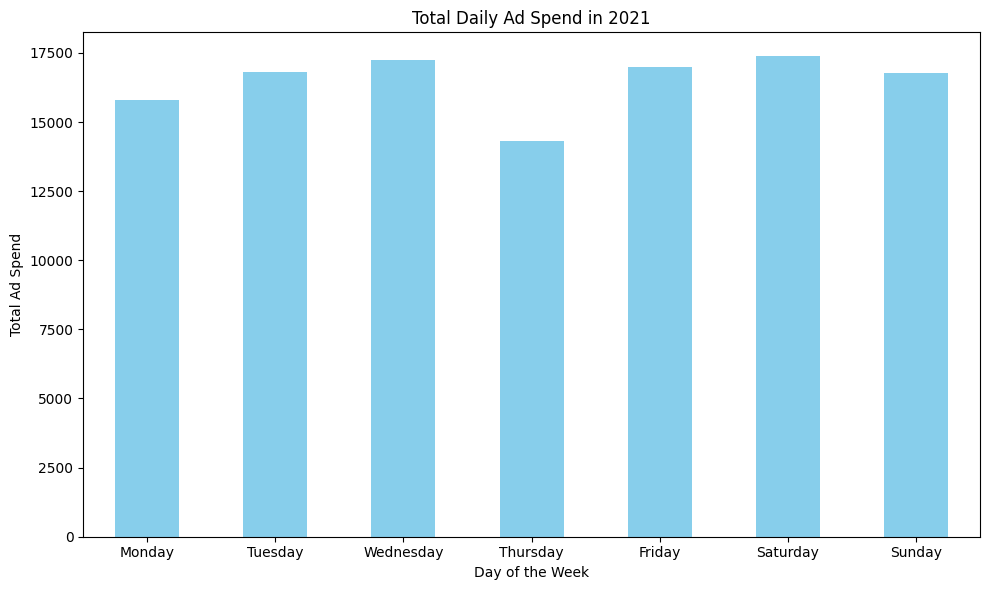

In [ ]:
#### ------------------------------------------------------------------
#### (Alternative version) A chart showing total daily ad spend in 2021
#### ------------------------------------------------------------------

# Filter the DataFrame to include only rows from 2021.
df_2021 = df[df['ad_date'].dt.year == 2021].copy()

# Create a new column for the day of the week.
# This gives us names like 'Monday', 'Tuesday', etc.
df_2021.loc[:,'weekday'] = df_2021['ad_date'].dt.day_name()

# Group by weekday and sum the total_spend.
# To ensure the days appear in the correct order, we reindex using an ordered list.
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_spend = df_2021.groupby('weekday')['total_spend'].sum().reindex(weekday_order)

# Plot the results as a bar chart.
plt.figure(figsize=(10, 6))
daily_spend.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ad Spend')
plt.title('Total Daily Ad Spend in 2021')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.tight_layout()
plt.show()


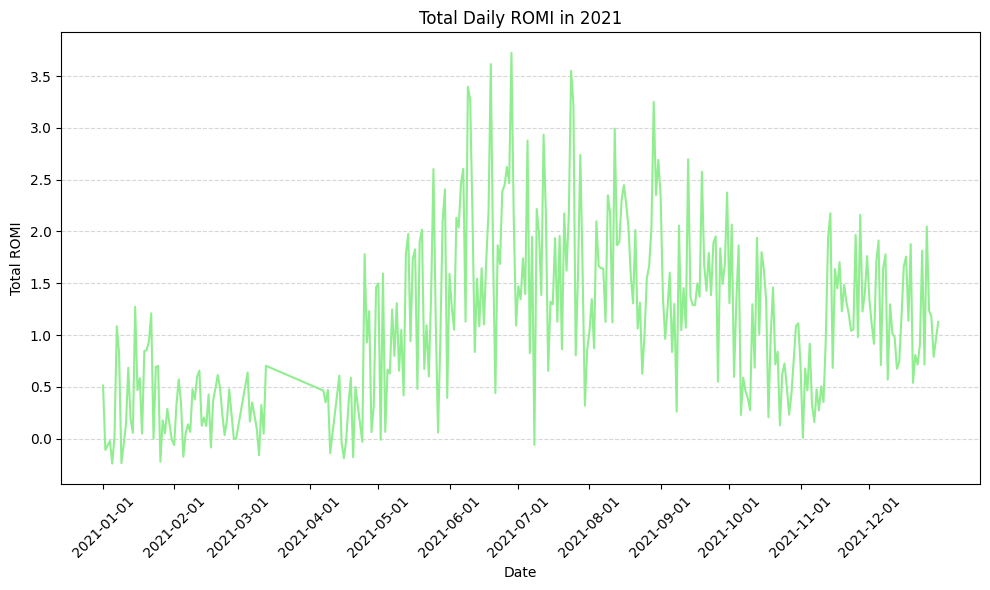

In [ ]:
# 1.2 - A chart showing daily ROMI in 2021

# Assuming df_2021 is your DataFrame for 2021 data

# Calculate daily ROMI using the correct formula
df_2021.loc[:,'romi'] = (df_2021['total_value'] - df_2021['total_spend']) / df_2021['total_spend']

# Group by ad_date and sum the ROMI values
daily_romi = df_2021.groupby('ad_date')['romi'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.plot(daily_romi.index, daily_romi.values, color='lightgreen')  # Use plot for line chart
plt.xlabel('Date')
plt.ylabel('Total ROMI')
plt.title('Total Daily ROMI in 2021')

tick_dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='MS')  # 'MS' for start of each month
# Format x-axis labels
plt.xticks(ticks=tick_dates, labels=tick_dates.strftime('%Y-%m-%d'), rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

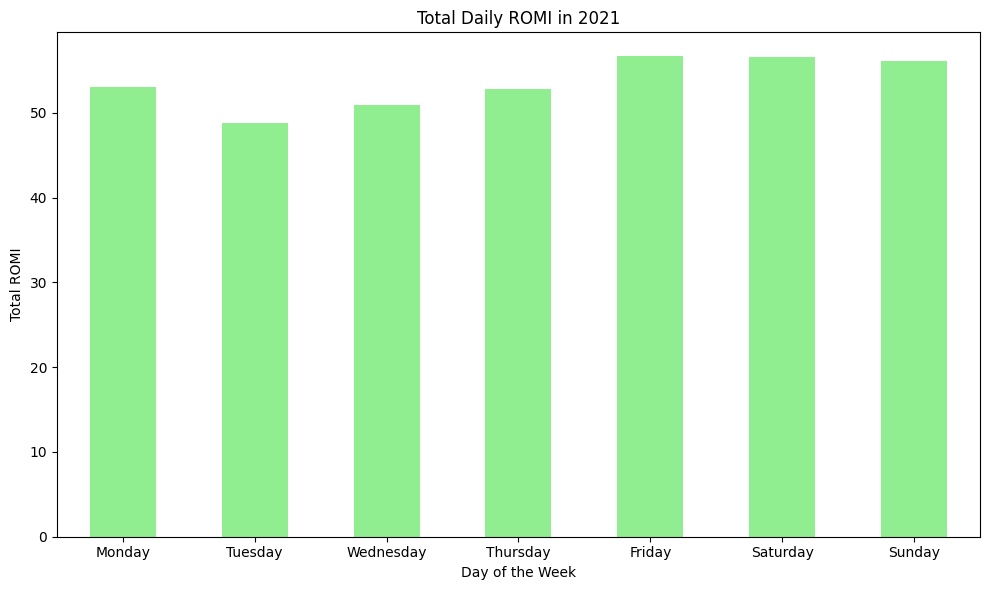

In [ ]:
#### ------------------------------------------------------------------
#### (Alternative version) A chart showing total daily ROMI
#### ------------------------------------------------------------------

# Calculate daily ROMI using the correct formula
df_2021.loc[:,'romi'] = (df_2021['total_value'] - df_2021['total_spend']) / df_2021['total_spend']

# Group by weekday and sum the romi values.
# Reindex with a predefined weekday order to ensure the correct display order.
daily_romi = df_2021.groupby('weekday')['romi'].sum().reindex(weekday_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
daily_romi.plot(kind='bar', color='lightgreen')
plt.xlabel('Day of the Week')
plt.ylabel('Total ROMI')
plt.title('Total Daily ROMI in 2021')
plt.xticks(rotation=0)  # Rotates the x-axis labels for better readability
plt.tight_layout()
plt.show()

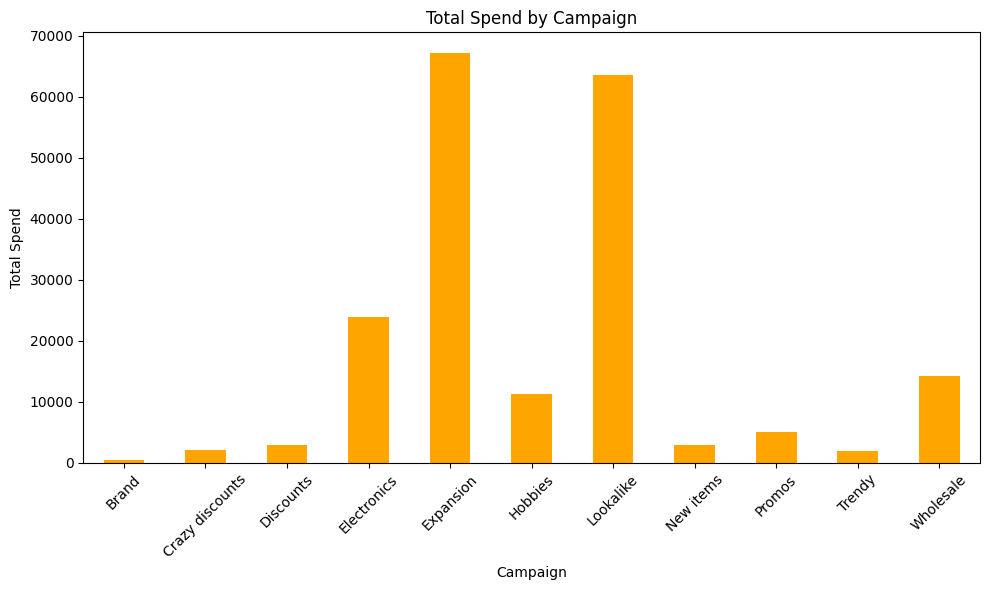

In [ ]:
# 2 - Create two charts by grouping data by campaign name

# 2.1 - Graph of total ad spend in each campaign

campaign_spend = df.groupby('campaign_name')['total_spend'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
campaign_spend.plot(kind='bar', color='orange')
plt.xlabel('Campaign')
plt.ylabel('Total Spend')
plt.title('Total Spend by Campaign')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()
plt.show()

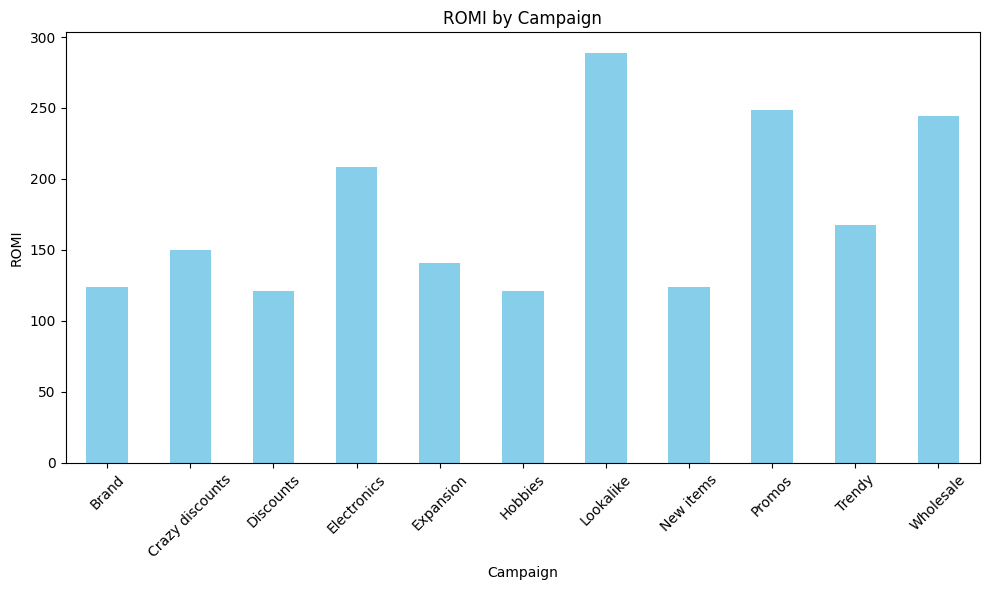

In [ ]:
# 2.2 - Graph of total ROMI in each campaign

campaign_romi = df.groupby('campaign_name')['romi'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
campaign_romi.plot(kind='bar', color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('ROMI')
plt.title('ROMI by Campaign')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()
plt.show()

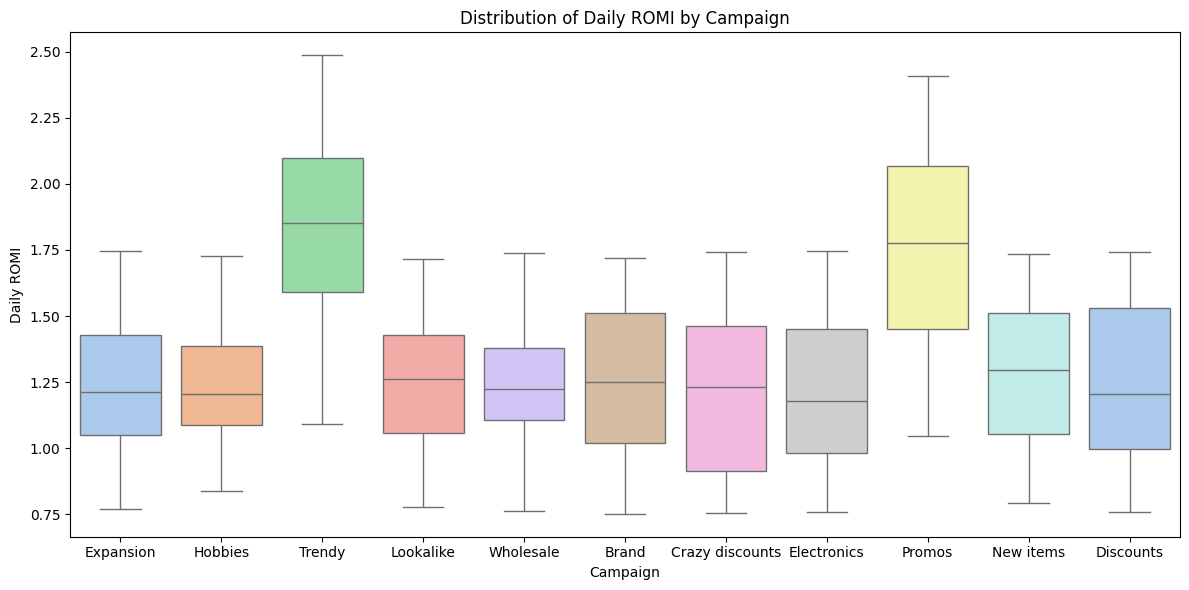

In [ ]:
# 3 - Determine how daily ROMI is distributed in each campaign using a box plot.

# Optional: If you want to drop rows where romi is missing
df_romi = df.dropna(subset=['romi'])

# Create a box plot using Seaborn.
# The x-axis represents the campaign and the y-axis shows the ROMI distribution.
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_romi, x='campaign_name', y='romi', hue='campaign_name',palette='pastel')

# Customize the plot.
plt.xlabel('Campaign')
plt.ylabel('Daily ROMI')
plt.title('Distribution of Daily ROMI by Campaign')
plt.xticks(rotation=0)  # Rotate campaign names for better readability
plt.tight_layout()       # Adjust layout to ensure labels are not cut off

# 4. Display the plot.
plt.show()

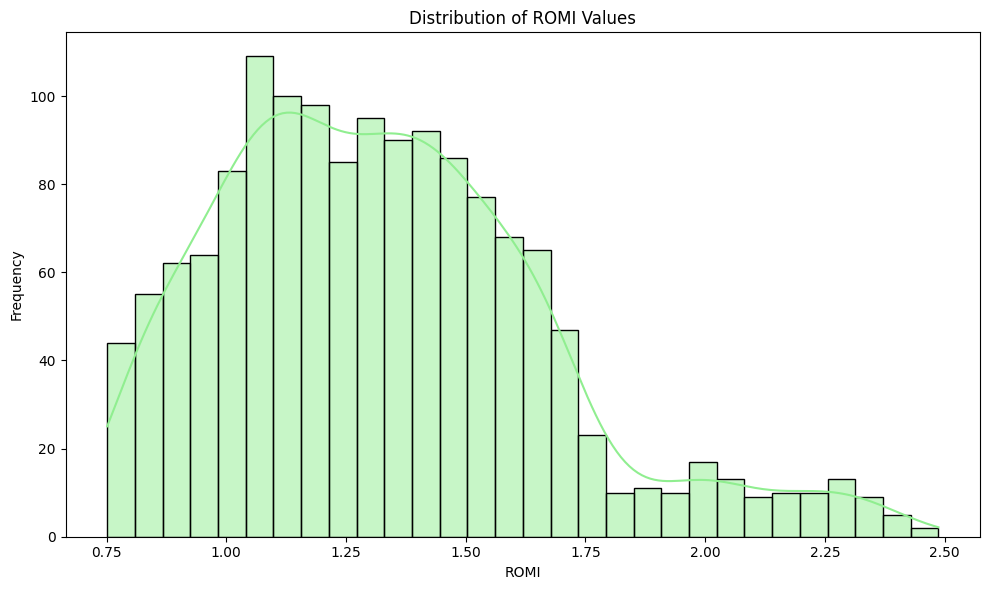

In [ ]:
# 4 - Create a histogram showing the distribution of ROMI values in the facebook_ads_data.csv table

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_romi, x='romi', bins=30, kde=True, color='lightgreen')

# Customize the plot
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.title('Distribution of ROMI Values')
plt.tight_layout()

# Display the plot
plt.show()

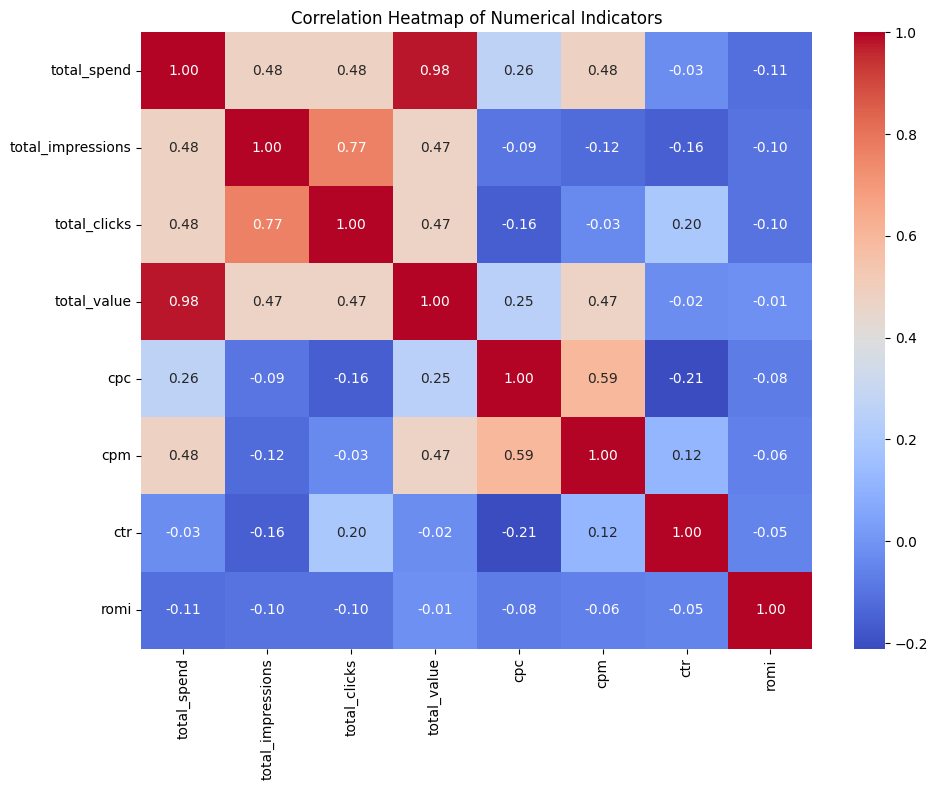

Highest correlation pair:
Feature1       total_spend
Feature2       total_value
Correlation        0.97889
Name: 2, dtype: object

Lowest correlation pair:
Feature1            cpc
Feature2            ctr
Correlation   -0.210719
Name: 23, dtype: object

Correlations with 'total_value':
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


In [ ]:
# 5 - Create a heatmap of the correlation between all numerical indicators in the facebook_ads_data.csv table
# Which indicators have the highest and lowest correlation? Which factors are correlated with "total_value"?

# Select only the numerical columns.
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix.
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Indicators")
plt.tight_layout()
plt.show()

# Identify the highest and lowest correlations (excluding self-correlation).
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
# Unstack the upper-triangle into a Series.
corr_pairs = corr_matrix.where(mask).stack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Find the highest correlation pair.
highest_corr = corr_pairs.loc[corr_pairs['Correlation'].idxmax()]
# Find the lowest correlation pair.
lowest_corr = corr_pairs.loc[corr_pairs['Correlation'].idxmin()]

print("Highest correlation pair:")
print(highest_corr)
print("\nLowest correlation pair:")
print(lowest_corr)

# Examine the correlation of all indicators with 'total_value'.
total_value_corr = corr_matrix['total_value'].drop('total_value').sort_values(ascending=False)
print("\nCorrelations with 'total_value':")
print(total_value_corr)

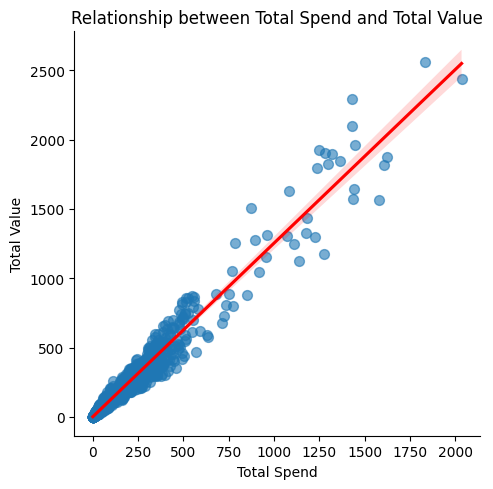

In [ ]:
# 6 - Create a dot plot with linear regression over the data "total_spend" and "total_value" to visualize the relationship
# between the variables (you can use the lmplot() function for this).

# Create a dot plot with linear regression using lmplot.
# 'scatter_kws' controls the appearance of the points and 'line_kws' for the regression line.
sns.lmplot(data=df, x='total_spend', y='total_value',
           scatter_kws={'s': 50, 'alpha': 0.6},   # size and transparency of points
           line_kws={'color': 'red'})              # regression line color

# Customize the plot
plt.title('Relationship between Total Spend and Total Value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.tight_layout()

# Display the plot
plt.show()
